# **TRAINING CODE**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Set path to your dataset
DATASET_PATH = "/content/drive/MyDrive/PlantDisease/cotton"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 16

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    rotation_range=15
)

train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 1369 images belonging to 4 classes.
Found 340 images belonging to 4 classes.


In [3]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SIZE + (3,),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False  # Freeze base model

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [4]:
EPOCHS = 10

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 530s 6s/step - accuracy: 0.6916 - loss: 0.7920 - val_accuracy: 0.9059 - val_loss: 0.3774
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.9425 - loss: 0.1721 - val_accuracy: 0.9382 - val_loss: 0.2275
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.9579 - loss: 0.1175 - val_accuracy: 0.9441 - val_loss: 0.1991
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.9788 - loss: 0.0763 - val_accuracy: 0.9471 - val_loss: 0.2058
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.9859 - loss: 0.0599 - val_accuracy: 0.9500 - val_loss: 0.1692
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.9843 - loss: 0.0525 - val_accuracy: 0.9559 - val_loss: 0.1874
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.9830 - loss: 0.0455 - val_accuracy: 0.9588 - val_loss: 0.1704
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.9834 - loss: 0.0623 - val_accuracy: 0.9559 - val_los

In [5]:
model.save('/content/drive/MyDrive/savedModels/cotton_disease_model.h5')


In [6]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/savedModels/cotton_disease_model.h5')


In [9]:
class_labels = list(train_generator.class_indices.keys())
print("Class labels:", class_labels)


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing import image
import random

# Choose a random image from the validation directory
val_dir = os.path.join(DATASET_PATH, random.choice(class_labels))
img_file = random.choice(os.listdir(val_dir))
img_path = os.path.join(val_dir, img_file)

# Load and preprocess image
img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = model.predict(img_array)
predicted_class = class_labels[np.argmax(pred)]

# Plot
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


# **TEST CODE**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving A-healthy-cotton-plant-leaf-having-no-spots.png to A-healthy-cotton-plant-leaf-having-no-spots (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


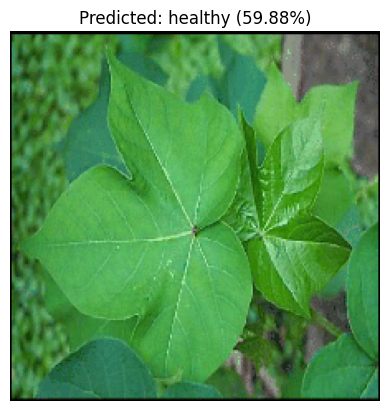

In [3]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Step 2: Set parameters
IMG_SIZE = (224, 224)
MODEL_PATH = '/content/drive/MyDrive/savedModels/cotton_disease_model.h5'
CLASS_LABELS = ['bacterial_blight','curl_virus', 'fussarium_wilt','healthy']  # Replace with actual class names from your training set

# Step 3: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 4: Load the trained model
model = load_model(MODEL_PATH)

# Step 5: Upload a custom image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Step 6: Preprocess the image
img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Step 7: Make prediction
prediction = model.predict(img_array)
predicted_class = CLASS_LABELS[np.argmax(prediction)]
confidence = np.max(prediction) * 100

# Step 8: Display results
plt.imshow(img)
plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%)")
plt.axis('off')
plt.show()
